In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
results_csv = pd.read_csv("Resultados.csv")

In [4]:
results_csv

,Você reside em...,Você tem condições de se alimentar em outro lugar com frequência?,Você acha que se alimenta bem?,Quanto você gasta por refeição quando o bandejão não abre?,Você gosta de comer no bandejão?,Você almoça e janta no bandejão?,Você toma café da manhã no bandejão?,Você almoça no bandejão aos sábados?,Quantas vezes você janta no bandejão por semana?,Quantas vezes você almoça no bandejão por semana?
0,Casa,Sim,Sim,20 a 40 reais,Não,"Não, eu só almoço.",Não,Não,Nenhuma,1 a 3 vezes
1,Apartamento,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,1 a 3 vezes,4 ou 5 vezes
2,Alojamento,Não,Sim,0 a 20 reais,Não,Sim,Sim,Sim,Todos os dias,Todos os dias
3,Apartamento,Não,Sim,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Sim,NaN,Todos os dias
4,Apartamento,Não,Sim,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Sim,1 a 3 vezes,Todos os dias
5,Casa,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,Todos os dias,Todos os dias
6,Apartamento,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,4 ou 5 vezes,4 ou 5 vezes
7,Apartamento,Sim,Não,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Não,1 a 3 vezes,1 a 3 vezes
8,Apartamento,Não,Não,20 a 40 reais,Sim,Sim,Não,Não,1 a 3 vezes,1 a 3 vezes
9,Apartamento,Não,Sim,20 a 40 reais,Sim,Sim,Sim,Sim,Todos os dias,Todos os dias


In [5]:
aloja = results_csv.groupby('Você reside em...').get_group("Alojamento")
casa = results_csv.groupby('Você reside em...').get_group("Casa")
apartamento = results_csv.groupby('Você reside em...').get_group("Apartamento")
rep = results_csv.groupby('Você reside em...').get_group("República")
mods = [aloja, casa, apartamento, rep]

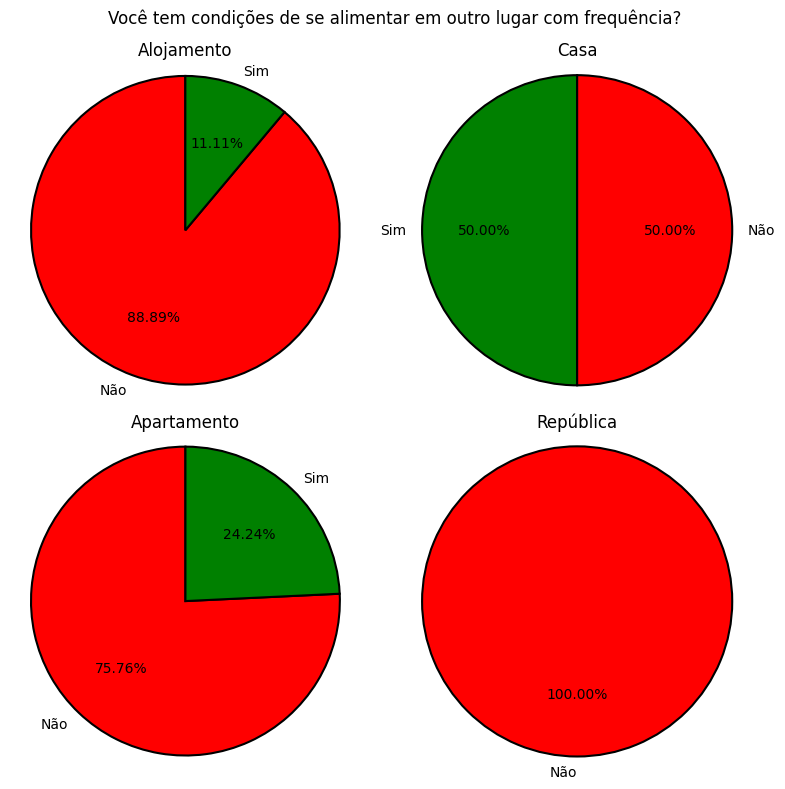

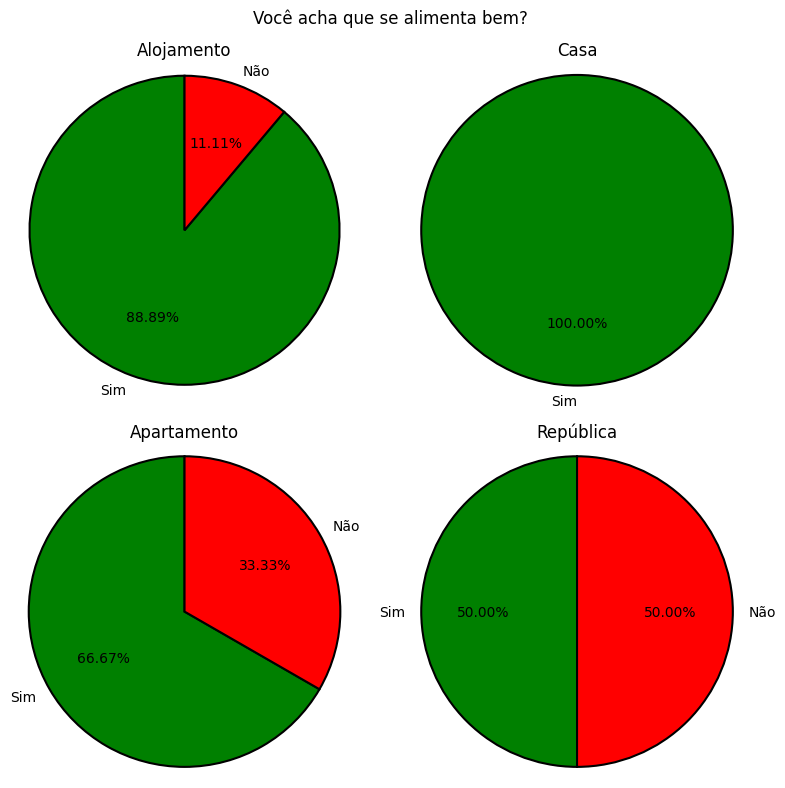

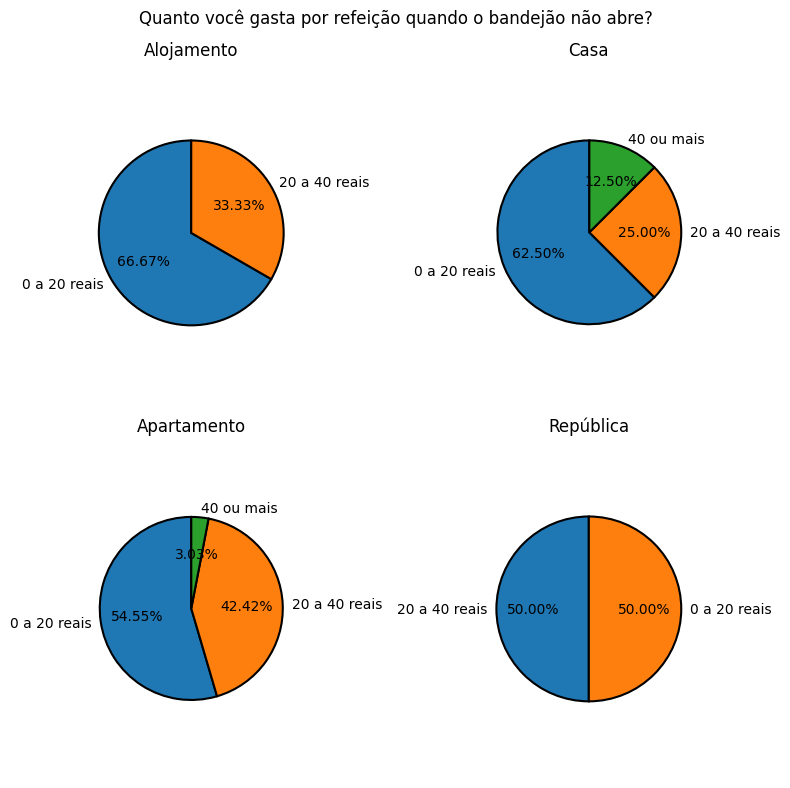

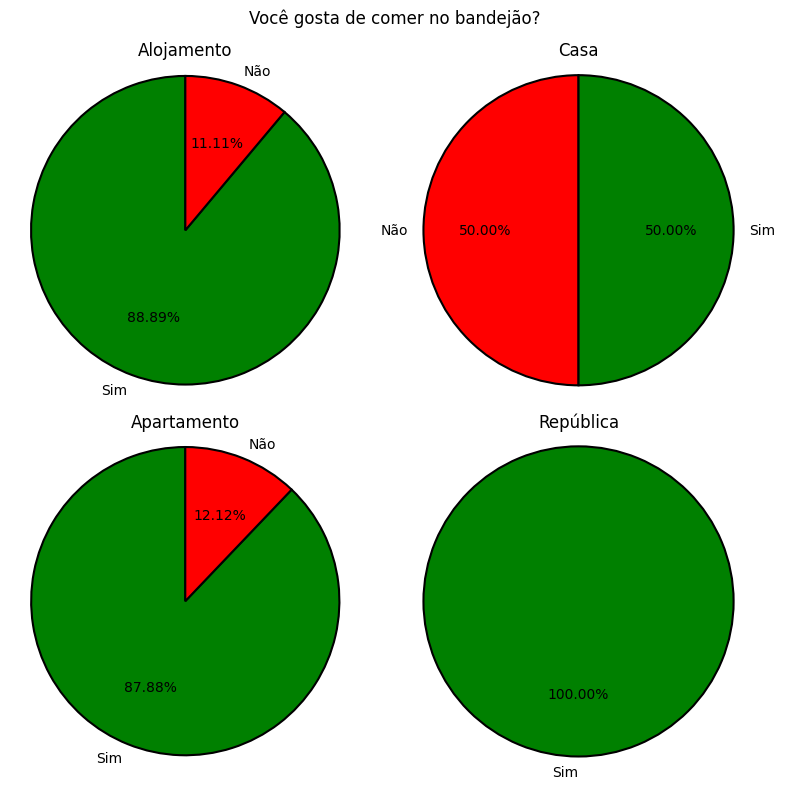

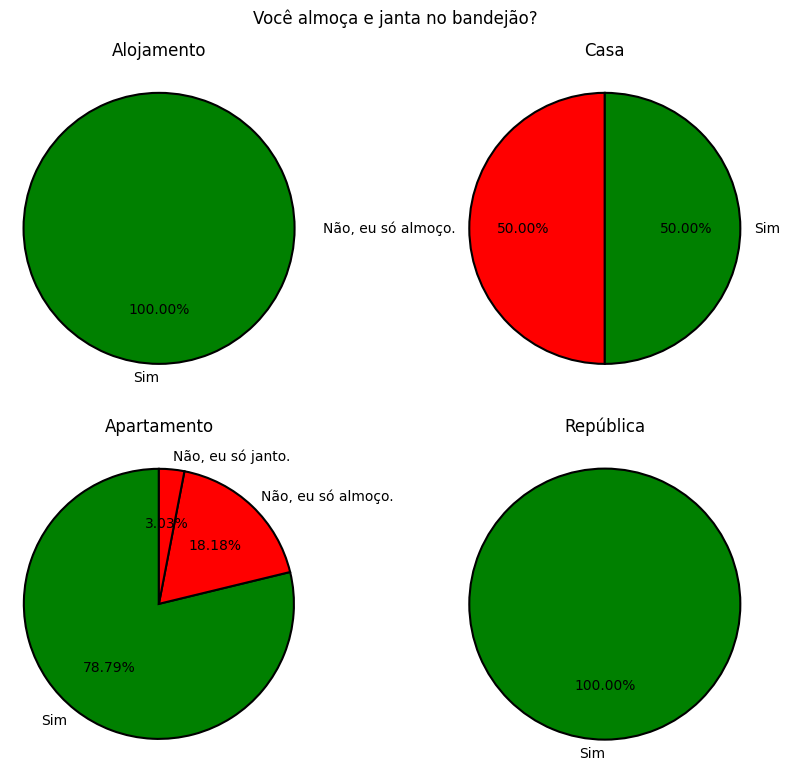

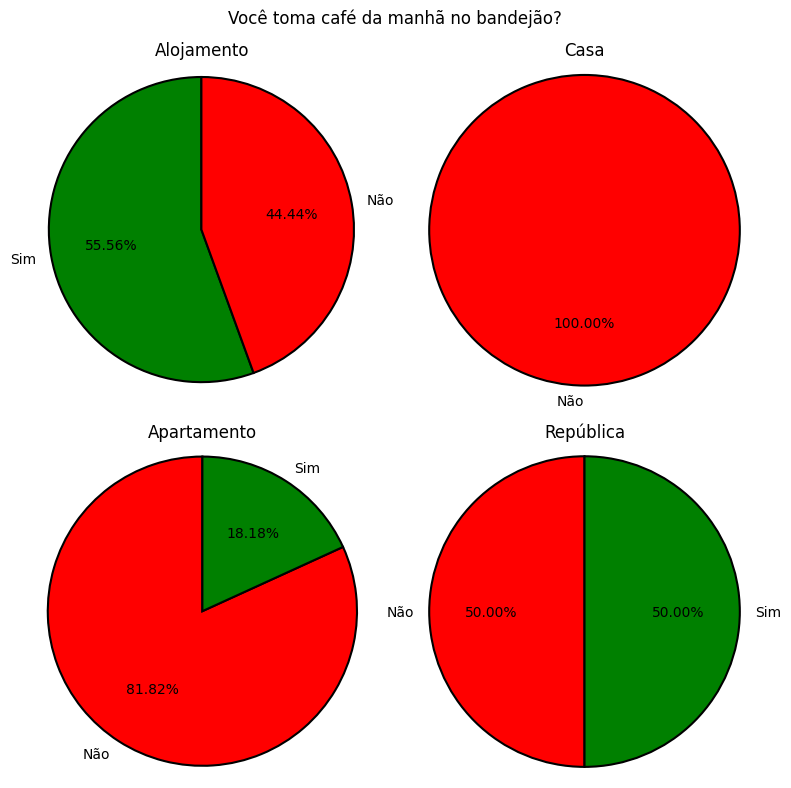

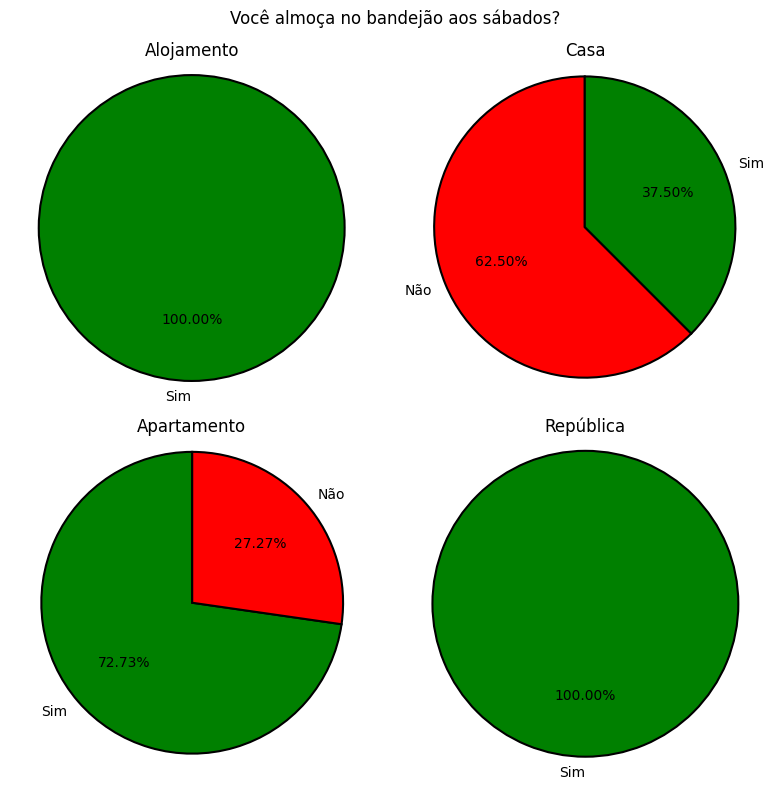

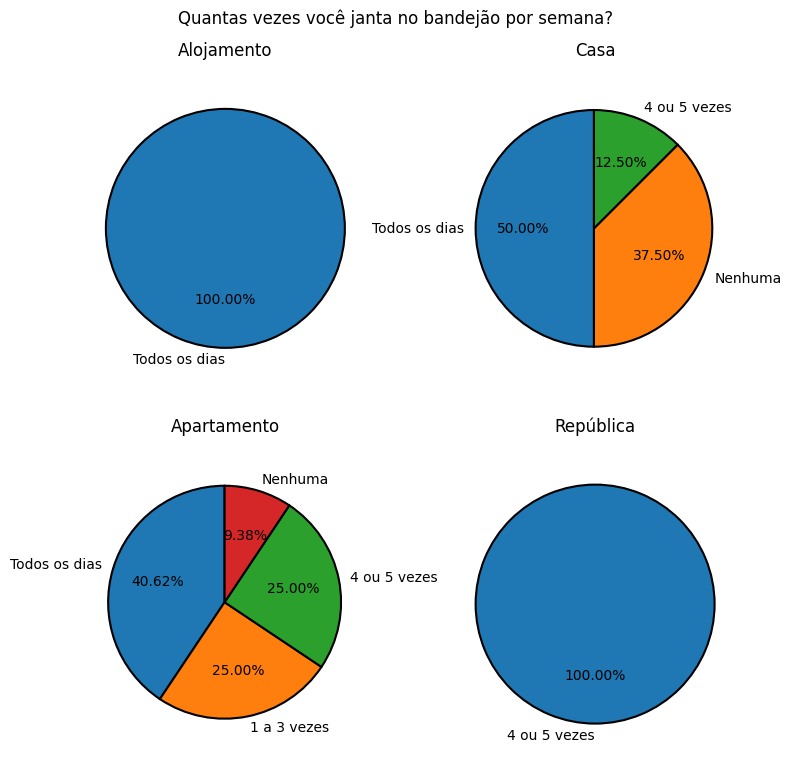

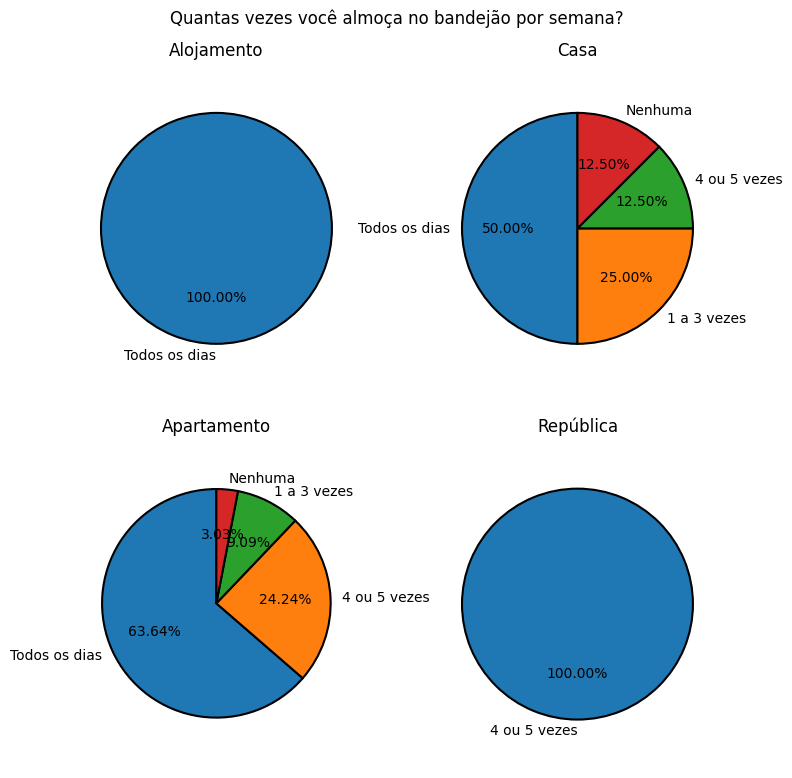

In [6]:
questions = results_csv.columns
questions = questions[1:]

for question in questions:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8), dpi=100)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    fig.suptitle(question)

    for mod, ax in zip(mods, axs):
        data = mod[question].value_counts()
        
        labels = data.keys()
        sizes = data.values
        
        if "Sim" in labels or "Não" in labels:
            colors = [("green" if data == "Sim" else "red") for data in data.keys()]
        else:
            colors = None
            
        wedgeprops = {"edgecolor":"0",'linewidth': 1.5}
        

        texts = ax.pie(sizes, labels=labels, autopct='%1.2f%%',
            startangle=90, colors = colors, wedgeprops = wedgeprops)
        ax.axis('equal')
        ax.set_title(mod["Você reside em..."].values[0])

    plt.tight_layout()
    plt.show()
    print("\n")

In [7]:
import numpy as np

In [8]:
a = results_csv['Você tem condições de se alimentar em outro lugar com frequência?'].value_counts()
print(a)
print("Média: " + str(np.mean(a.to_numpy())))
print("Desvio Padrão: " + str(np.std(a.to_numpy())))

Não    39
Sim    13
Name: Você tem condições de se alimentar em outro lugar com frequência?, dtype: int64
Média: 26.0
Desvio Padrão: 13.0


In [9]:
a = results_csv['Quantas vezes você janta no bandejão por semana?'].value_counts()
print(a)

print("Desvio Padrão: " + str(np.std(a.to_numpy())))

Todos os dias    26
4 ou 5 vezes     11
1 a 3 vezes       8
Nenhuma           6
Name: Quantas vezes você janta no bandejão por semana?, dtype: int64
Desvio Padrão: 7.854139036202504


In [10]:
a = results_csv['Quantas vezes você almoça no bandejão por semana?'].value_counts()
print(a)
print("Desvio Padrão: " + str(np.std(a.to_numpy())))

Todos os dias    34
4 ou 5 vezes     11
1 a 3 vezes       5
Nenhuma           2
Name: Quantas vezes você almoça no bandejão por semana?, dtype: int64
Desvio Padrão: 12.549900398011133


In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

results_csv = pd.read_csv("Resultados.csv")

aloja = results_csv.groupby('Você reside em...').get_group("Alojamento")
casa = results_csv.groupby('Você reside em...').get_group("Casa")
apartamento = results_csv.groupby('Você reside em...').get_group("Apartamento")
rep = results_csv.groupby('Você reside em...').get_group("República")
moradias = [aloja, casa, apartamento, rep]

questions = results_csv.columns
questions = questions[1:]

#print(questions)
for question in questions:
    arrayAnaliseDescritiva = []
    arrayAmostragem = []
    for tipoMoradia in moradias:
        answer = tipoMoradia[question].value_counts()
        print(tipoMoradia['Você reside em...'].values[0])
        print(answer)
        
        #não esta funcionando em for loop do question
        """ media = np.mean(answer)
        mediana = np.median(answer.to_numpy())
        variancia = np.var(answer.to_numpy())
        desvioPadrao = np.std(answer.to_numpy())
        amplitude = desvioPadrao / media
        
        amostragem = answer.sum()   
        arrayAmostragem.append(amostragem)
        
        array = [media, mediana, variancia, desvioPadrao, amplitude]
        arrayAnaliseDescritiva.append(array)
    #criando tabela
    columns=["Média", "Mediana", "Variância", "Desvio Padrão", "Amplitude"]

    lines = ["Alojamento- "+str(arrayAmostragem[0]), "Casa- "+str(arrayAmostragem[1]), "Apartamento- "+str(arrayAmostragem[2]), "República- "+str(arrayAmostragem[3])]
    table = pd.DataFrame(arrayAnaliseDescritiva, columns=columns, index=lines)
    table """
    print('\n')

Alojamento
Não    8
Sim    1
Name: Você tem condições de se alimentar em outro lugar com frequência?, dtype: int64
Casa
Sim    4
Não    4
Name: Você tem condições de se alimentar em outro lugar com frequência?, dtype: int64
Apartamento
Não    25
Sim     8
Name: Você tem condições de se alimentar em outro lugar com frequência?, dtype: int64
República
Não    2
Name: Você tem condições de se alimentar em outro lugar com frequência?, dtype: int64


Alojamento
Sim    8
Não    1
Name: Você acha que se alimenta bem?, dtype: int64
Casa
Sim    7
Name: Você acha que se alimenta bem?, dtype: int64
Apartamento
Sim    22
Não    11
Name: Você acha que se alimenta bem?, dtype: int64
República
Sim    1
Não    1
Name: Você acha que se alimenta bem?, dtype: int64


Alojamento
0 a 20 reais     6
20 a 40 reais    3
Name: Quanto você gasta por refeição quando o bandejão não abre?, dtype: int64
Casa
0 a 20 reais     5
20 a 40 reais    2
40 ou mais       1
Name: Quanto você gasta por refeição quando o bandej